<a href="https://colab.research.google.com/github/AnastasiaWen/Freesurfer_macaque_pip/blob/main/FreeSurfer_NHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FreeSurfer Surface on Macaque Tutorial**

This notebook will guide you through the procedure to create single monkey surface representations in three steps (some are optional):


1.   Average multiple T1 scans from the same animal && Correct images. (takes seconds)
2.   Segment the (averaged) T1 of an individual animal using the NMT template as a prior. (takes many hours)
3.   Create surfaces and flatmaps using Freesurfer. (takes up to to several hours depending on segmentation quality at the start)

Author: Anne Wen🤗



---



##**Initiate**
Setup the terminal environment and create environmental variables here, run this scirpt:

**Note:**```<SUBJ>```is the monkey/workdir name

Please use source!!!!!not bash!!!

In [ ]:
#be sure you are in bash
bash
#***********setup environment**************
 source /Users/lai/Desktop/FS_NMT/wen_script/fs_fsl_ants_start.sh <SUBJ>

After run this scrip, you will have some workdir (if you set the ```<SUBJ>``` ):

*   ```NMT_path=/Users/lai/Desktop/FS_NMT```
*   ```NMT_ss_path=${NMT_path}/single_subject_scans/${SUBJ}```, there is a T1s dir in it to put in your T1 images.





---


##**Step 1: Average multiple T1 scans from the same animal && Correct images**



###**Procedure:**


*   Copy your all T1 scan image **(*.nii.gz)**  to the dir ```${NMT_path}/single_subject_scans/${SUBJ}/T1s```
***Note(important!!):**if you have only one T1 image, copy it to 2 images.
*   Run this script:
The script will:

> * Correct for having the monkey in the sphinx position
> * Resample each T1 to 0.5 mm isotropic voxels
> * Reorient the colume for correct display in FSL (e.g., with FSLEyes)
> * Normalize the contrast gradient
> * Average the multiple T1's together using motion correction to account for small differences















In [ ]:
sh $NMT_path/wen_script/average_multiple_t1.sh $NMT_ss_path T1s $SUBJ

###**Result:**
When the script is done, there should be a <SUBJ>.nii.gz file in the root <SUBJ> folder, like this: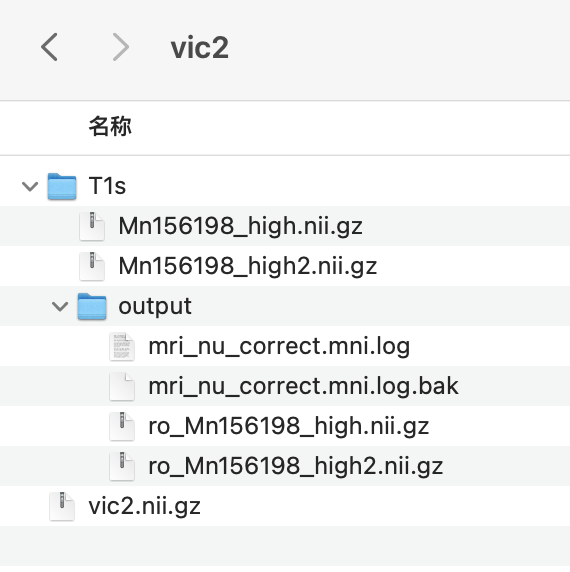



---


##**Step 2: Segment the single subject anatomy using the NMT template as a prior**





###**Based on:** NMT version2 template and SARM subcortical template [NMT v2](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv2.html)&&[SARM](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/atlas_sarm.html)

###**Procedure:**
* This will segment and process the single-subject anatomical and warp the D99 atlas (https://afni.nimh.nih.gov/Macaque) to your individual anatomy.
* Create ```<SUBJ>_wm.nii.gz``` which is without cerebellem-brainstem.
* And fill wm so that we can split the left and right brain without using the coordinate of the -CC & -PC (It is good for human, but I think it's annoying for NHP. If u try, u will know it😩) instead of using NMT_LR_mask (Sound wonderful, isn't it?👍🏻).

Run this scrip with your ```<SUBJ>```:

**Note:** If the error about PYTHON occured, try this command: ```unset PYTHONPATH```

Sometime you need to restart the terminal and use this command.


In [ ]:
sh $NMT_path/wen_script/align_and_process_singlesubject.sh ${NMT_path} ${SUBJ}

***Other Tips:***
 The probability brainmask for antsbrainextraction.sh isn't offered in the NMT v2, so I use this command to generate it with the NMT_brainmask, you can also have a try to directly use the brainmask
to be the prob maskj. And you can also use this command to generate your own prob mask:

```SmoothImage 3 NMT_brainmask.nii.gz 1.0 probabilityMask.nii.gz 1```







##**Step 3: Create surfaces and flatmaps using Freesurfer**
###**Procedure:**


*   Let we have the first run of tesselate and fix topology!



In [ ]:
sh $NMT_path/wen_script/NMT_subject_flat ${NMT_path} ${SUBJ}

***Note:***Check the (mri_convert) results (```wm_conform.mgz && filled_conform.mgz ```), if the voxel value of these conform results are uniform, please use the operation parameter "-c"

After that, using ```freeview``` to view the surface ```*h.inflated && *h.smoothwm``` in the ```${SUBJ}/fsSurf/temp```. Now you have a rough surface, so you can fix the wm/filled.mgz to fix the hole and bridges (These shouldn't exist!! 😡)as following pictures. I will teach you how to fix these deficits :)

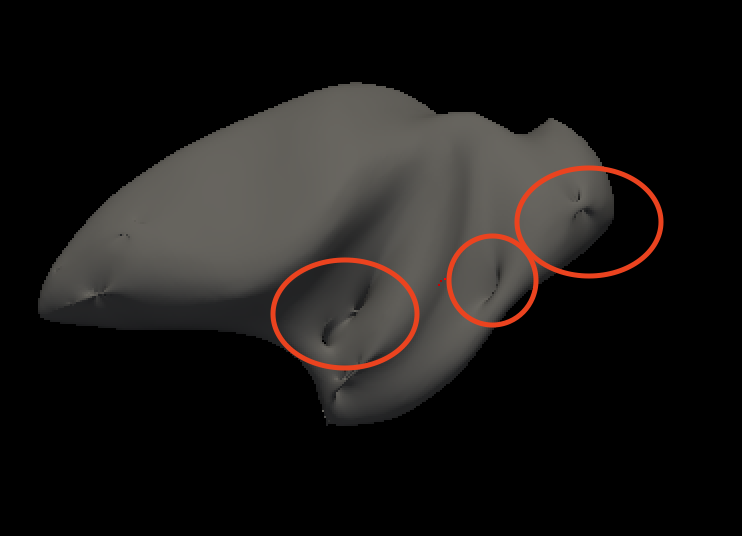


*   *Tutorial for wm edit* (we upgrade for filled edit):



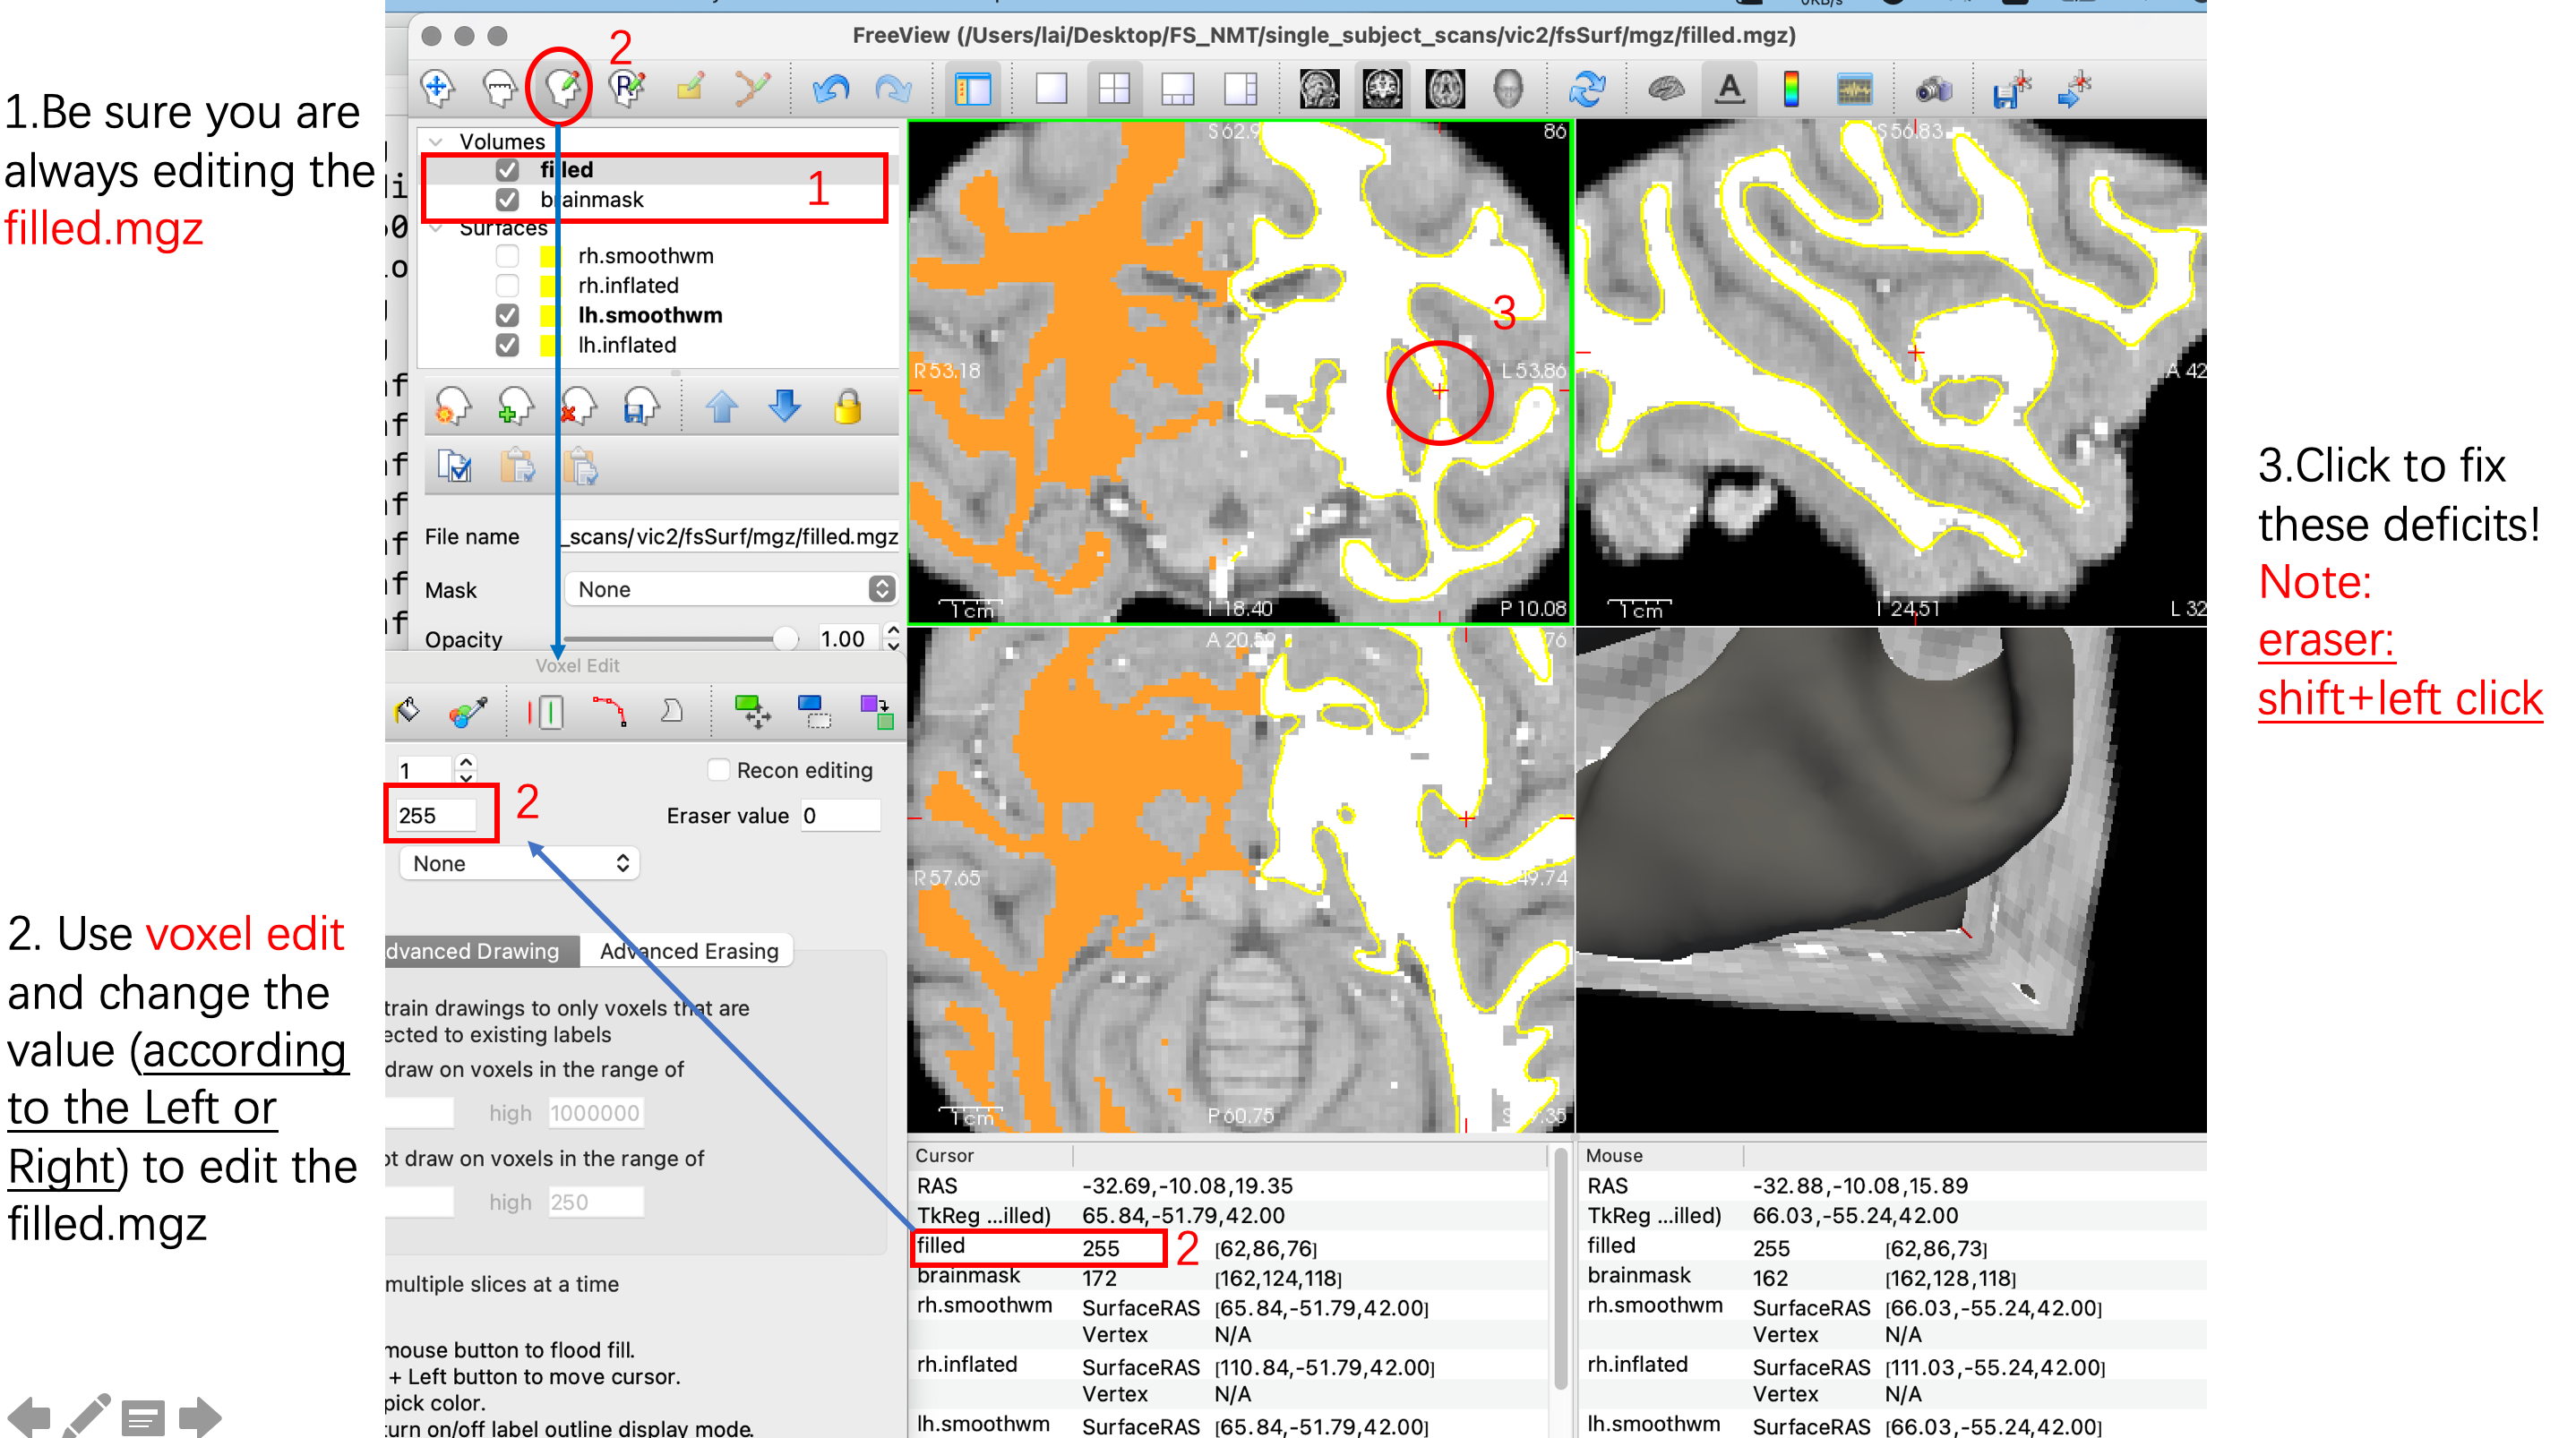

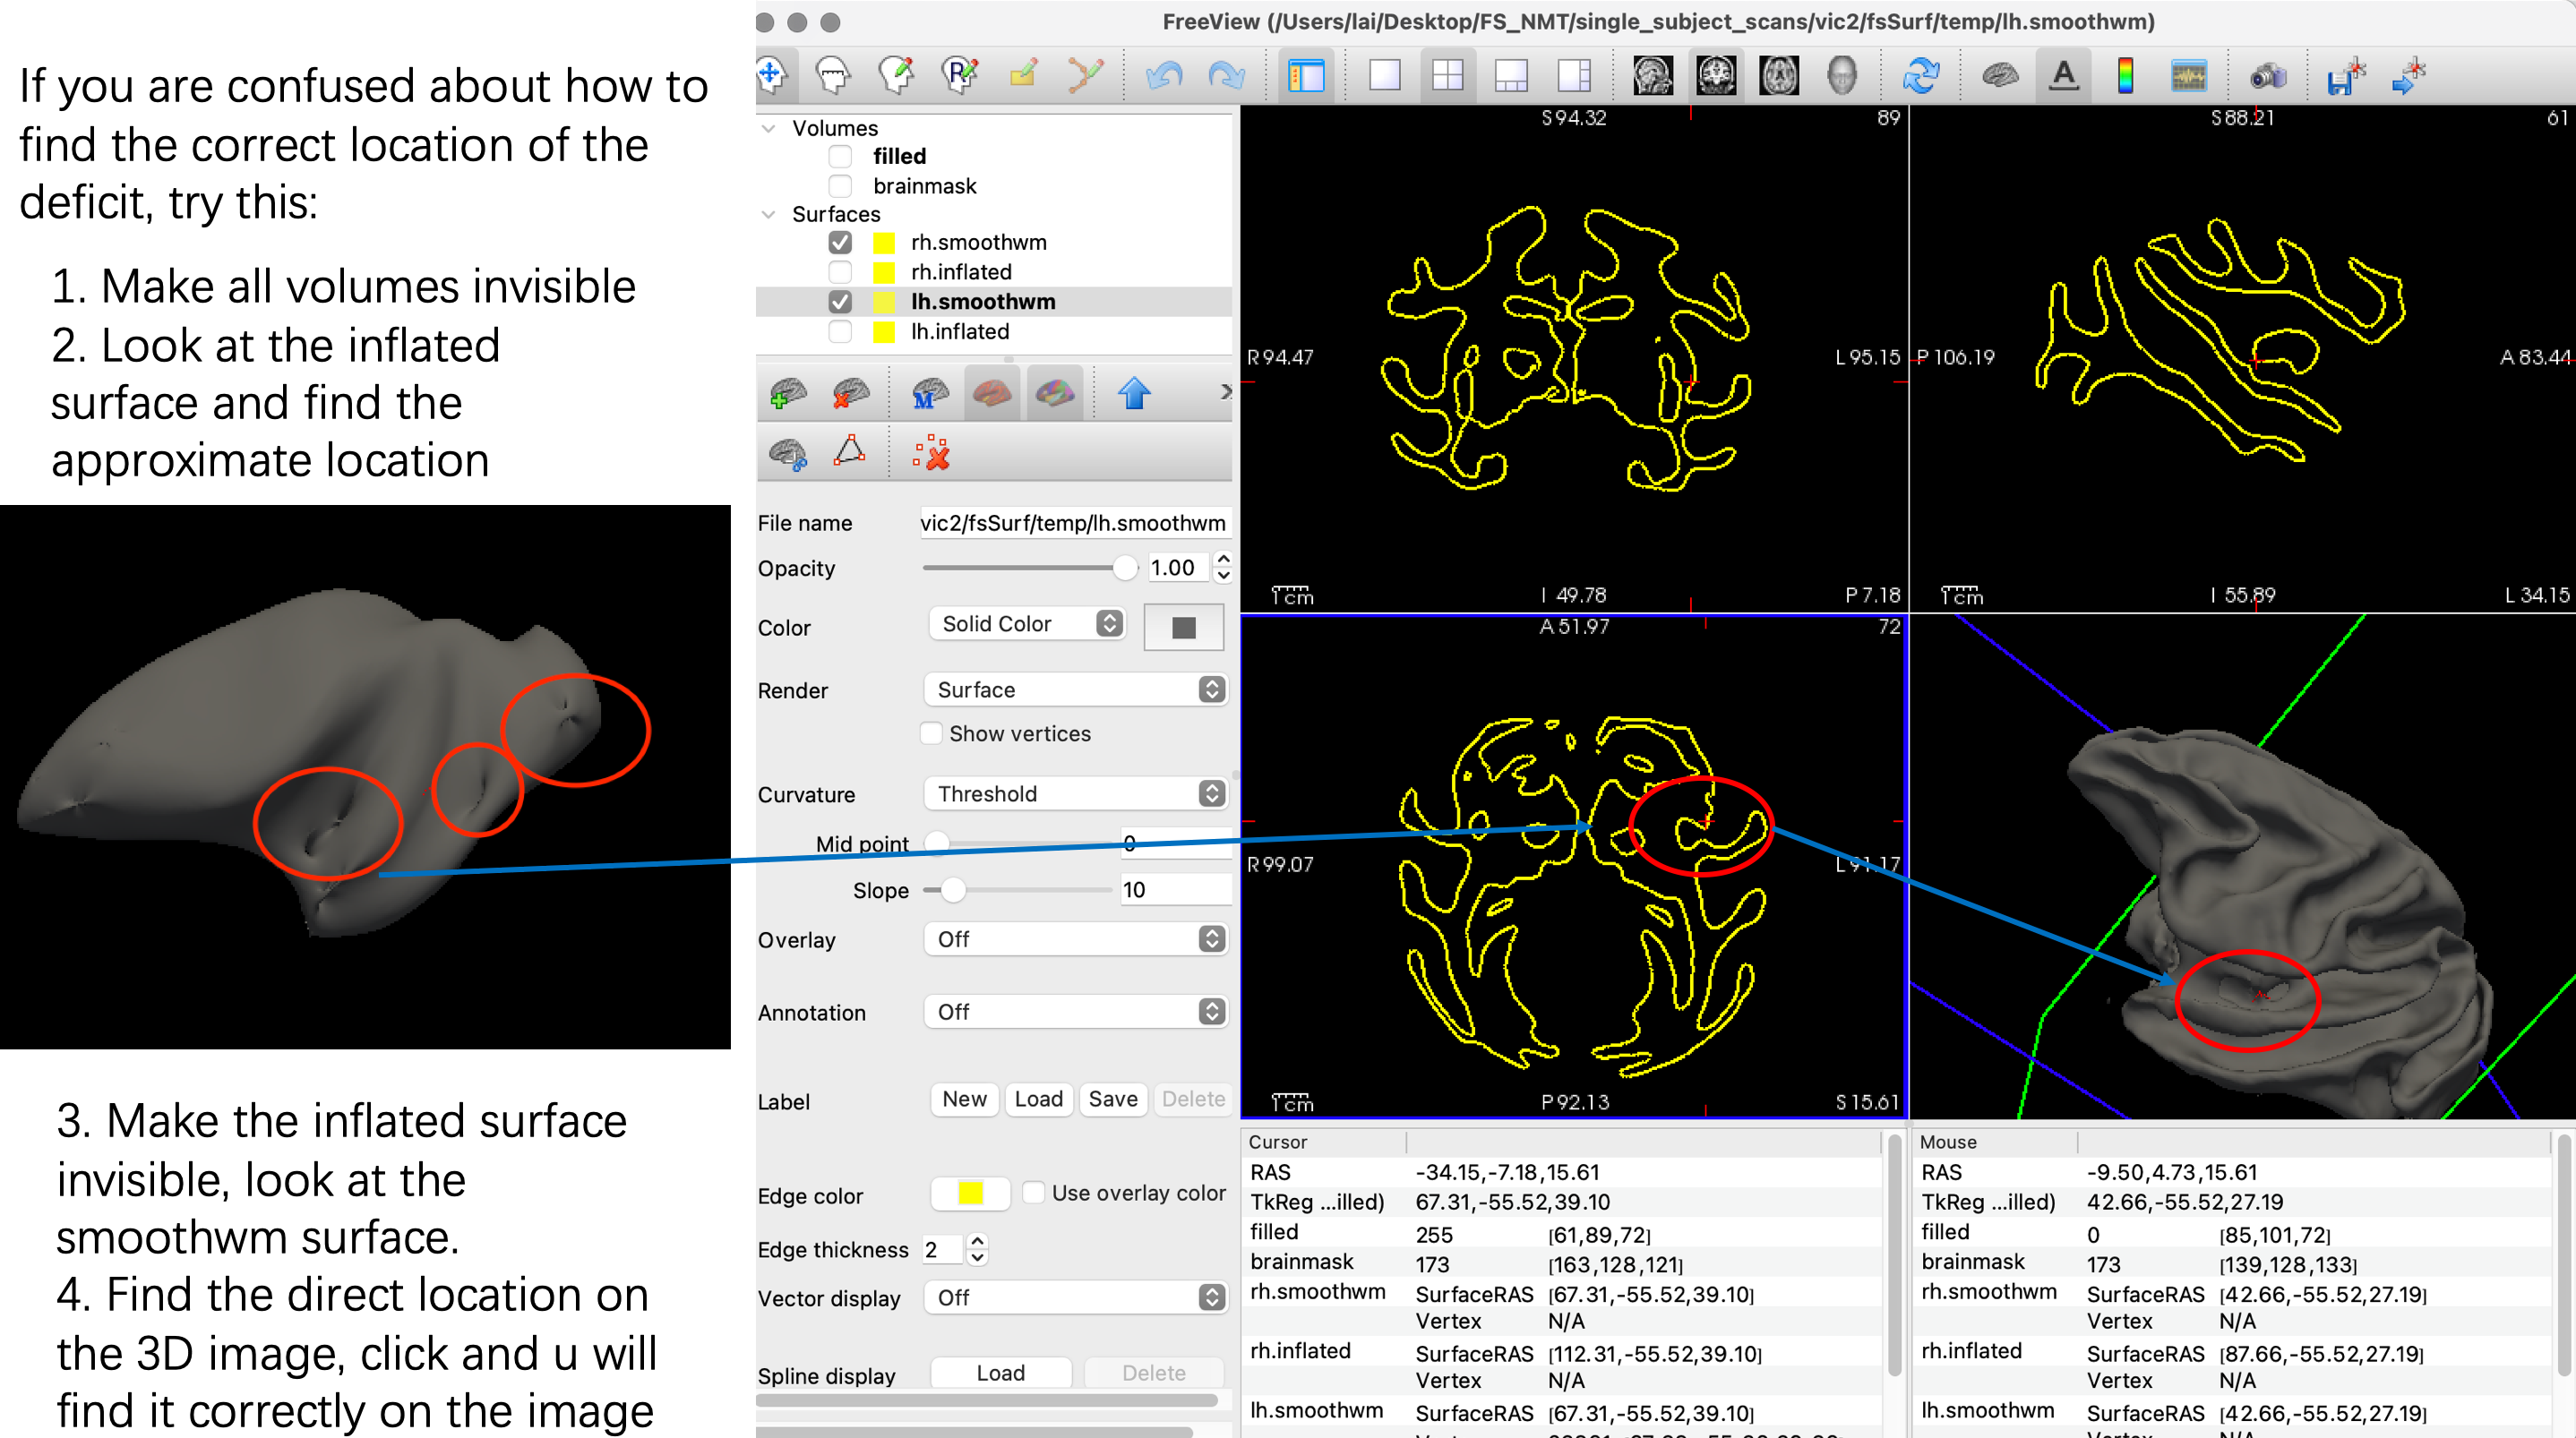

Using this commad to view your results, now edit the filled.mgz by voxel edit

In [ ]:
freeview -v ${NMT_ss_path}/fsSurf/mgz/brainmask.mgz -v ${NMT_ss_path}/fsSurf/mgz/filled.mgz:colormap=gecolor -f ${NMT_ss_path}/fsSurf/temp/lh.smoothwm -f ${NMT_ss_path}/fsSurf/temp/lh.inflated -f ${NMT_ss_path}/fsSurf/temp/rh.smoothwm -f ${NMT_ss_path}/fsSurf/temp/rh.inflated



*   After filled.mgz edited, redo the tesselate and fix toplology (using operation parameter ```-r```)



In [ ]:
sh $NMT_path/wen_script/NMT_subject_flat ${NMT_path} ${SUBJ} -r

You should redo this step untill the surface looked like this:

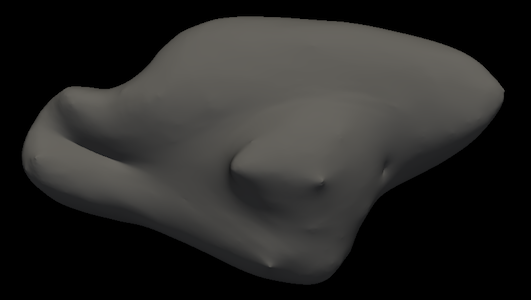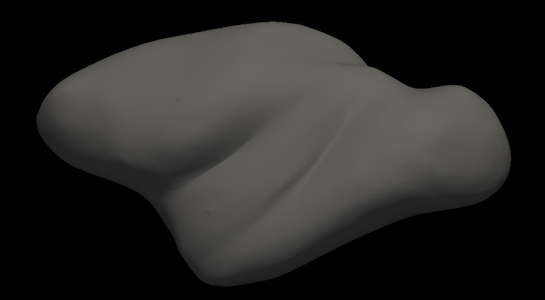



*   Congratulations! 🎊 🎉  We are in final step!Now run this command to create final surface in your *Freesurfer subject dir*.



In [ ]:
bash NMT_subject_sphere ${NMT_path} ${SUBJ} ${SUBJECTS_DIR}

Use this command to check results:

In [ ]:
freeview -f ${SUBJECTS_DIR}/${SUBJ}/surf/lh.smoothwm ${SUBJECTS_DIR}/${SUBJ}/surf/lh.inflated ${SUBJECTS_DIR}/${SUBJ}/surf/lh.sphere &

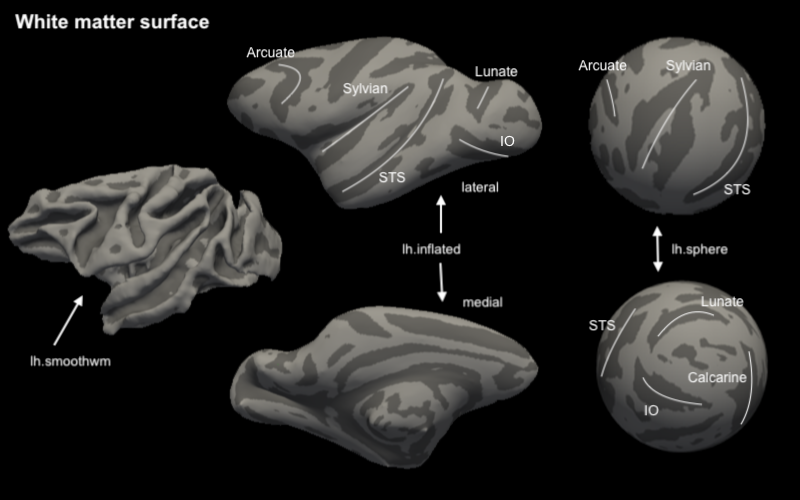